<font size=10>Laboratorio 6<font/>

<font size=6>Johan Andres Mendez Macea<font/>
***

# Punto 1

## Librerias

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import sklearn.tree as dtree
from sklearn.neighbors import KNeighborsClassifier
# import graphviz
from IPython.display import Image
from sklearn.tree import export_text 
import pydotplus
import graphviz

import seaborn as sns


## Datos

In [215]:
url="https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv"
descargar = pd.read_csv(url,usecols=["Date","Product line","Branch","City","Customer type","Gender","Quantity"])
tablacompras=pd.DataFrame(descargar)
tablacompras["Date"]=pd.to_datetime(tablacompras["Date"],format="%m/%d/%Y")
tablacompras.head(4)

Branch       City Customer type  Gender            Product line  Quantity  \
0      A     Yangon        Member  Female       Health and beauty         7   
1      C  Naypyitaw        Normal  Female  Electronic accessories         5   
2      A     Yangon        Normal    Male      Home and lifestyle         7   
3      A     Yangon        Member    Male       Health and beauty         8   

        Date  
0 2019-01-05  
1 2019-03-08  
2 2019-03-03  
3 2019-01-27

## Linea de producto más vendida

In [216]:
# frecuencia=tablacompras
actual=tablacompras[["Product line","Quantity"]]
unicos=list(np.unique(tablacompras["Product line"]))
valores=[]
for x in unicos:
   valores.append(actual[actual["Product line"] == x].sum().values[-1])
tratando=list(zip(unicos,valores))
tratando=pd.DataFrame(tratando)
tratando.columns=["Product line", "# Comprados"]
tratando=tratando.sort_values("# Comprados",ascending=False)
tratando.head(1)



Product line  # Comprados
0  Electronic accessories          971

<font size=5>La línea de producción con más ventas es "Electronic accessories" con una frecuencia de 971</font>

## Frecuencia diaria de ventas para la Línea de productos "Electronic accesories"

In [217]:
tratando2=tablacompras[["Date","Product line","Quantity"]]
tratando2=tratando2[tratando2["Product line"]=="Electronic accessories"]

tratando2=tratando2.sort_values("Date",ascending=True)
tratando2=tratando2.drop(["Product line"],axis=1)
tratando2

unicos2=np.unique(tratando2["Date"])
unicos2
coincide=[tratando2[tratando2["Date"]==x].sum().values[-1] for x in unicos2 ]
coincide

lista2=list(zip(unicos2,coincide))
lista2=pd.DataFrame(lista2,columns=["Date","Vendido"])
lista2.index=lista2["Date"].values
lista2=lista2.drop(columns=["Date"])
lista2
# tratando
# tratando=tratando.groupby(["Quantity"])

/tmp/ipykernel_2477/457501986.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  coincide=[tratando2[tratando2["Date"]==x].sum().values[-1] for x in unicos2 ]


Vendido
2019-01-01       18
2019-01-02        6
2019-01-04       10
2019-01-05        7
2019-01-07        4
...             ...
2019-03-26       12
2019-03-27        2
2019-03-28       10
2019-03-29       14
2019-03-30        8

[75 rows x 1 columns]

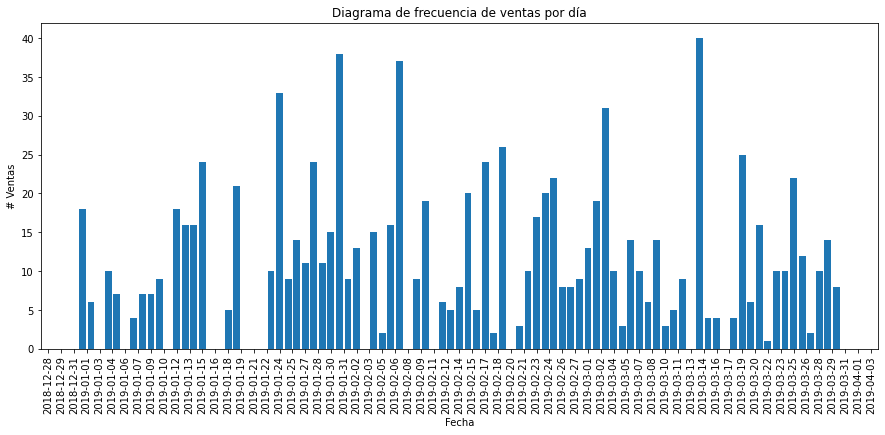

In [256]:


fig,(ax1)=plt.subplots(1,1,figsize=(15,6))
ax1.bar(lista2.index,lista2["Vendido"],width=0.8)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("# Ventas")
ax1.xaxis.set_major_locator(mticker.MaxNLocator(70))
ax1.set_title("Diagrama de frecuencia de ventas por día")
plt.xticks(rotation=90)
plt.show()



## Clasificación

### GaussianNB

In [219]:
tclasificar=tablacompras.drop(["Date","Quantity"],axis=1)
tclasificar
competir=pd.DataFrame(index=["GaussianNB","DecisionTreeClassifier","K-Nearest"])

In [220]:
y_pruebas=tclasificar["Product line"].values
x_pruebas=tclasificar.iloc[:,0:4]
le=preprocessing.LabelEncoder()

pre_Branch=le.fit_transform(x_pruebas["Branch"])
pre_Branch_unicos=list(zip(np.unique(pre_Branch),le.inverse_transform(pre_Branch)))
pre_city=le.fit_transform(x_pruebas["City"])
pre_city_unicos=list(zip(np.unique(pre_city),le.inverse_transform(np.unique(pre_city))))
pre_customtype=le.fit_transform(x_pruebas["Customer type"])
pre_customtype_unicos=list(zip(np.unique(pre_customtype),le.inverse_transform(np.unique(pre_customtype))))
pre_gender=le.fit_transform(x_pruebas["Gender"])
pre_gender_unicos=list(zip(np.unique(pre_gender),le.inverse_transform(np.unique(pre_gender))))
y_pree=le.fit_transform(y_pruebas)

modeloN=list(zip(pre_Branch,pre_city,pre_customtype,pre_gender))
modeloN
x_train,x_test,y_train,y_test = train_test_split(modeloN,y_pree,test_size=0.3)
model=GaussianNB()
model.fit(x_train,y_train)
y_pre=model.predict(x_test)
precision1=accuracy_score(y_pre,y_test)
print(F"Precision de GaussianNB: {precision1*100}%")
competir.loc["GaussianNB","Precisión"]=precision1



Precision de GaussianNB: 15.333333333333332%


### Decision Tree

In [221]:
clf=dtree.DecisionTreeClassifier(criterion='entropy')
clf_train=clf.fit(x_train,y_train)
y_prede=clf.predict(x_test)
r=export_text(clf_train,feature_names=list(tclasificar.iloc[:,0:4].columns.values))
print(r)


|--- Gender <= 0.50
|   |--- Customer type <= 0.50
|   |   |--- Branch <= 1.50
|   |   |   |--- City <= 1.00
|   |   |   |   |--- class: 2
|   |   |   |--- City >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Branch >  1.50
|   |   |   |--- class: 2
|   |--- Customer type >  0.50
|   |   |--- Branch <= 1.50
|   |   |   |--- City <= 1.00
|   |   |   |   |--- class: 1
|   |   |   |--- City >  1.00
|   |   |   |   |--- class: 2
|   |   |--- Branch >  1.50
|   |   |   |--- class: 0
|--- Gender >  0.50
|   |--- Branch <= 1.50
|   |   |--- Customer type <= 0.50
|   |   |   |--- City <= 1.00
|   |   |   |   |--- class: 3
|   |   |   |--- City >  1.00
|   |   |   |   |--- class: 0
|   |   |--- Customer type >  0.50
|   |   |   |--- Branch <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- Branch >  0.50
|   |   |   |   |--- class: 5
|   |--- Branch >  1.50
|   |   |--- Customer type <= 0.50
|   |   |   |--- class: 3
|   |   |--- Customer type >  0.50
|   |   |   |--- class: 0



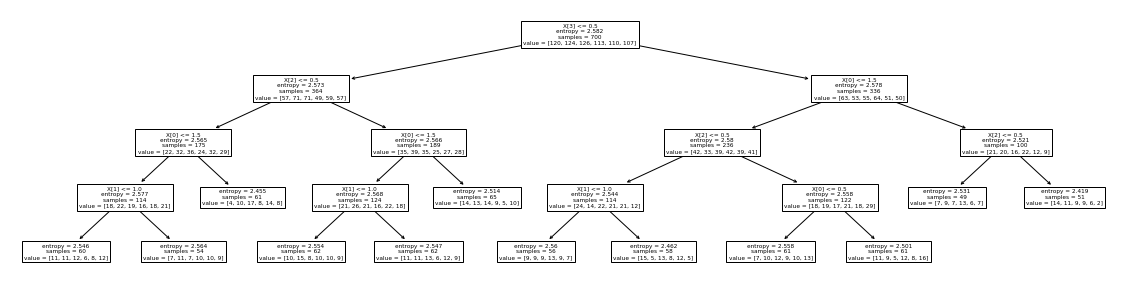

In [222]:
fig=plt.subplots(1,1,figsize=(20,5))
dtree.plot_tree(clf)
plt.show()

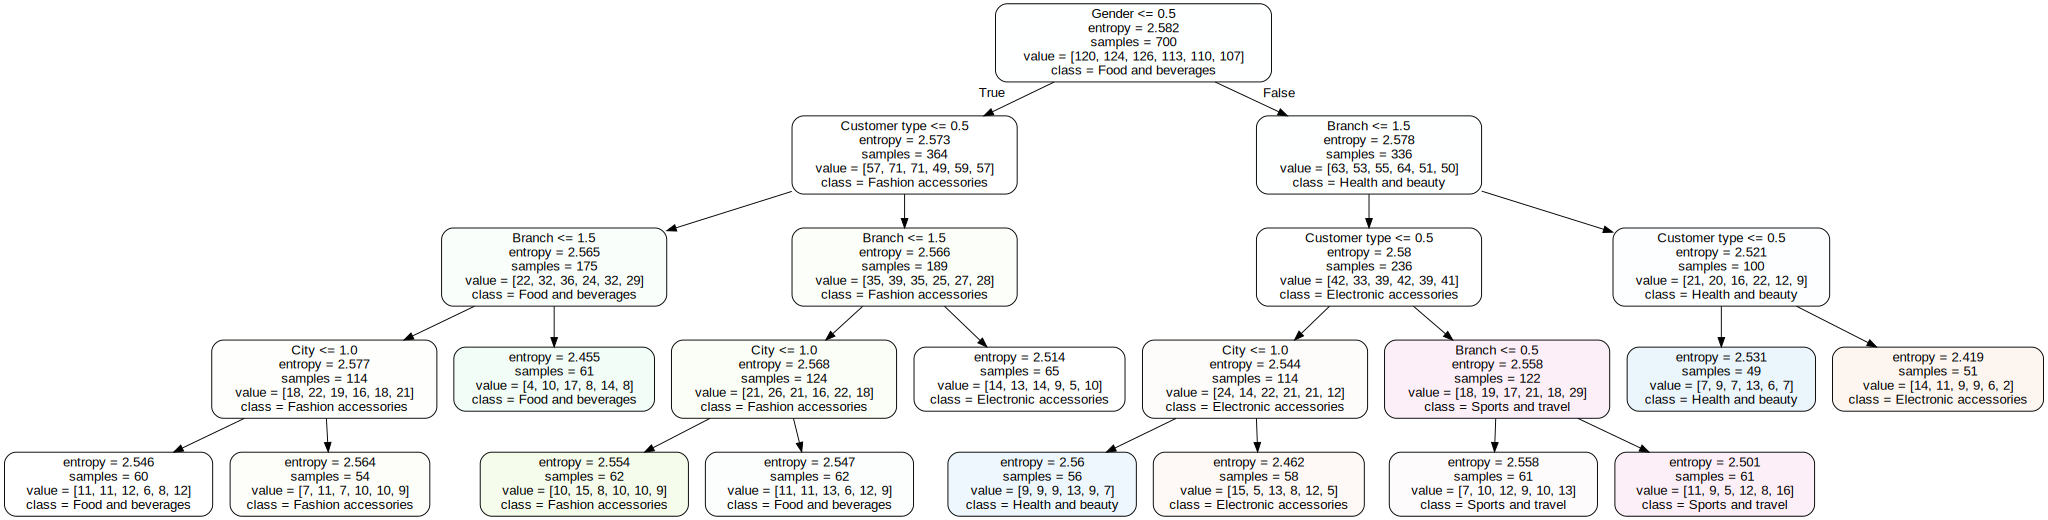

In [223]:
dot_data=dtree.export_graphviz(clf_train, out_file=None, feature_names=list(tclasificar.iloc[:,0:4].columns.values), 
                                class_names=list(np.unique(tclasificar["Product line"].values)), rounded=True, filled=True)

# graph = pydotplus.graph_from_dot_data(dot_data)
graph=graphviz.Source(dot_data)
# Image(graph.create_png())
# y_prede=le.transform(y_prede)
graph

<font size=6>La entropía se muestra muy alta, este factor es muy importante y muy informante sobre los datos y la predictibilidad de ellos, tales datos tienen alto desorden por lo tanto no deben considerarse los modelos para hacer predicciones</font>

In [224]:
print("Branch correspondency: ",pre_Branch_unicos)
print("City correspondency: ",pre_city_unicos)
print("Custom type correspondency: ",pre_customtype_unicos)
print("Gender correspondency: ",pre_gender_unicos)
# list(zip(np.unique(),le.inverse_transform(np.unique())))

Branch correspondency:  [(0, 'A'), (1, 'C'), (2, 'A')]
City correspondency:  [(0, 'Mandalay'), (1, 'Naypyitaw'), (2, 'Yangon')]
Custom type correspondency:  [(0, 'Member'), (1, 'Normal')]
Gender correspondency:  [(0, 'Female'), (1, 'Male')]


In [225]:
precision2=accuracy_score(y_prede,y_test)
print(F"Precision de DecisionTreeClassifier: {precision2*100}%")
competir.loc["DecisionTreeClassifier","Precisión"]=precision2

Precision de DecisionTreeClassifier: 14.333333333333334%


### K-Nearest

In [226]:
x_train,x_test,y_train,y_test = train_test_split(modeloN,y_pree,test_size=0.3)
Knn=KNeighborsClassifier(n_neighbors=3) ##Modelo K-Nearest
knnmodel=Knn.fit(x_train,y_train)
predecir=knnmodel.predict(x_test)
precision3=accuracy_score(predecir,y_test)
print(F"Precision de K-Nearest: {precision3*100}%")
competir.loc["K-Nearest","Precisión"]=precision3

Precision de K-Nearest: 18.666666666666668%


### Mayor precisión

In [227]:
competir=competir.sort_values("Precisión",ascending=False)
ganador=competir.head(1)
competir

Precisión
K-Nearest                0.186667
GaussianNB               0.153333
DecisionTreeClassifier   0.143333

In [228]:
print(F"Modelo con Mayor precision: {ganador.index[0]}")

Modelo con Mayor precision: K-Nearest


***
# Punto 2

***

## Datos

In [229]:
df_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
            header=None)
df_cancer.columns=['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df_cancer.head()


id number  Clump Thickness  Uniformity of Cell Size  \
0    1000025                5                        1   
1    1002945                5                        4   
2    1015425                3                        1   
3    1016277                6                        8   
4    1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          10                3                2        1      2  
2           2                3                1        1      2  
3           4                3                7        1      2  
4           1                3                1        1      2

In [230]:
df_cancer[df_cancer["Bare Nuclei"]=='?']

id number  Clump Thickness  Uniformity of Cell Size  \
23     1057013                8                        4   
40     1096800                6                        6   
139    1183246                1                        1   
145    1184840                1                        1   
158    1193683                1                        1   
164    1197510                5                        1   
235    1241232                3                        1   
249     169356                3                        1   
275     432809                3                        1   
292     563649                8                        8   
294     606140                1                        1   
297      61634                5                        4   
315     704168                4                        6   
321     733639                3                        1   
411    1238464                1                        1   
617    1057067                1                        1   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
23                          5                  1                            2   
40                          6                  9                            6   
139                         1                  1                            1   
145                         3                  1                            2   
158                         2                  1                            3   
164                         1                  1                            2   
235                         4                  1                            2   
249                         1                  1                            2   
275                         3                  1                            2   
292                         8                  1                            2   
294                         1                  1                            2   
297                         3                  1                            2   
315                         5                  6                            7   
321                         1                  1                            2   
411                         1                  1                            1   
617                         1                  1                            1   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
23            ?                7                3        1      4  
40            ?                7                8        1      2  
139           ?                2                1        1      2  
145           ?                2                1        1      2  
158           ?                1                1        1      2  
164           ?                3                1        1      2  
235           ?                3                1        1      2  
249           ?                3                1        1      2  
275           ?                2                1        1      2  
292           ?                6               10        1      4  
294           ?                2                1        1      2  
297           ?                2                3        1      2  
315           ?                4                9        1      2  
321           ?                3                1        1      2  
411           ?                2                1        1      2  
617           ?                1                1        1      2

## Frecuencia tipos

(Tipo,Frencuencia): [(2, 458), (4, 241)]


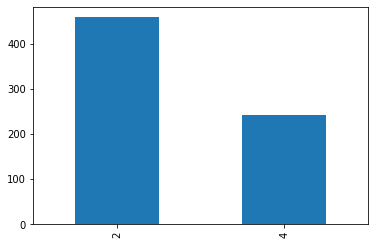

In [231]:
clases=df_cancer["Class"]
clases.value_counts().plot(kind="bar")
print(F"(Tipo,Frencuencia): {list(zip(clases.value_counts().index,clases.value_counts().values))}")
df_cancer=df_cancer[df_cancer["Bare Nuclei"]!='?']
df_cancer["Bare Nuclei"]=df_cancer["Bare Nuclei"].astype(np.int64)

## Diagrama de cajas

Relación x/columnas: 
(0, 'Clump Thickness') 

(1, 'Uniformity of Cell Size') 

(2, 'Uniformity of Cell Shape') 

(3, 'Marginal Adhesion') 

(4, 'Single Epithelial Cell Size') 

(5, 'Bare Nuclei') 

(6, 'Bland Chromatin') 

(7, 'Normal Nucleoli') 

(8, 'Mitoses') 



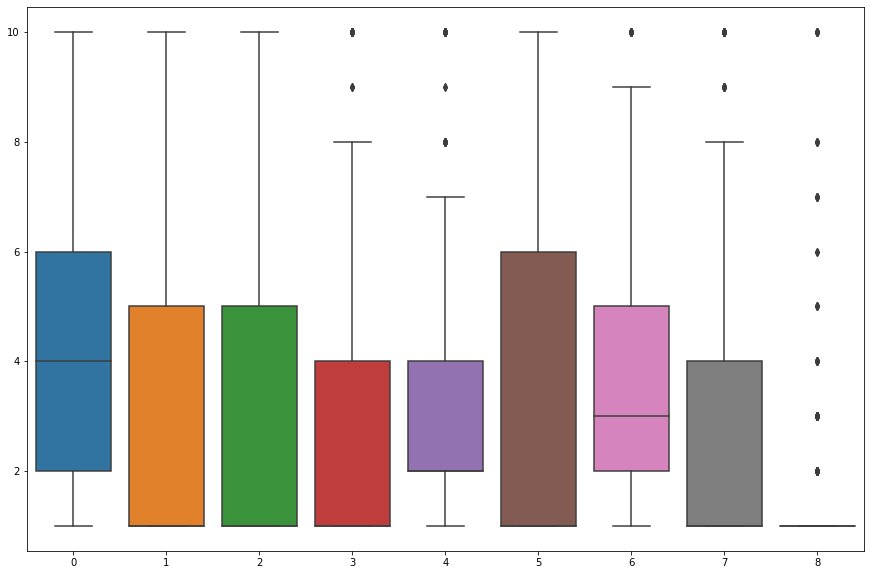

In [232]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
datos=[df_cancer.iloc[:,x].values for x in range(1,10)]
# datos=np.array(datos)
tabla2=df_cancer.iloc[:,1:10]
sns.boxplot(data=tabla2.values)
# ax1.set_xticks(df_cancer.iloc[:,1:10])
print("Relación x/columnas: ")
for x in list(zip(np.arange(9),tabla2.columns)):
    print(x,"\n")


## Histograma

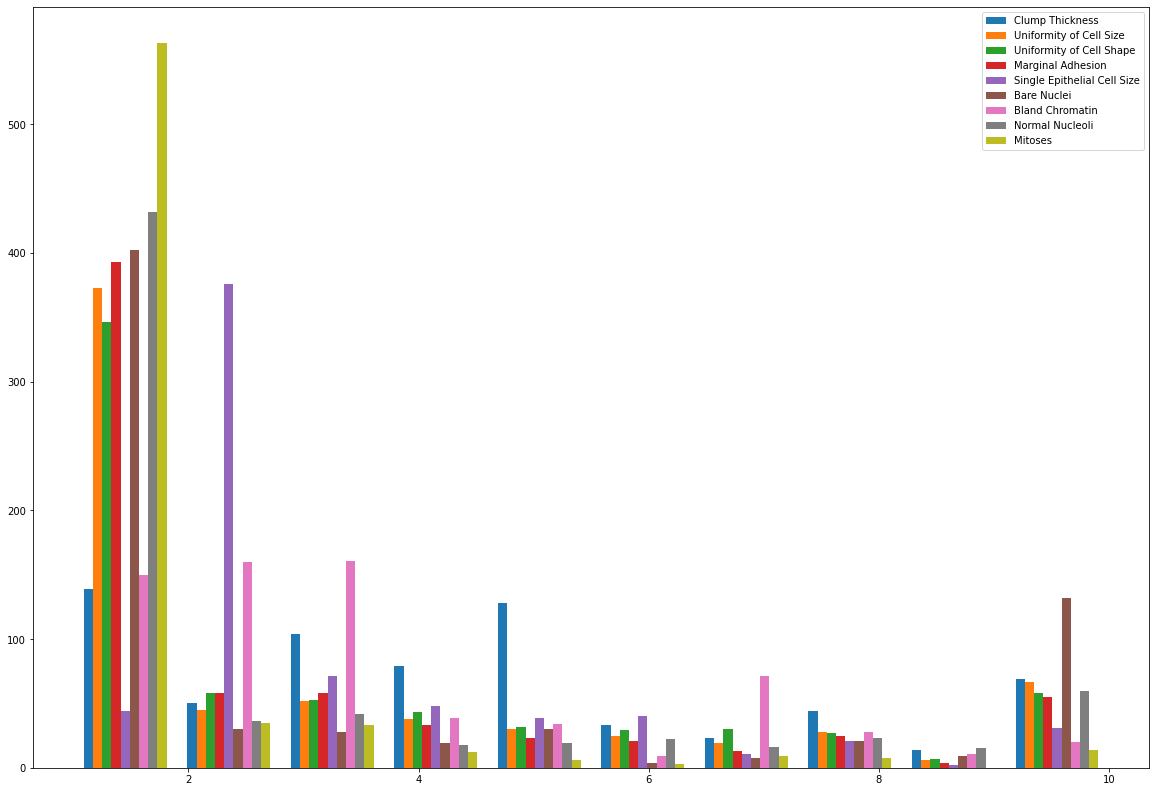

In [233]:
fig2,ax2=plt.subplots(1,1,figsize=(20,14))
labels=tabla2.columns
# labels
ax2.hist(tabla2,label=labels)
ax2.legend(labels)

## Matriz Correlación

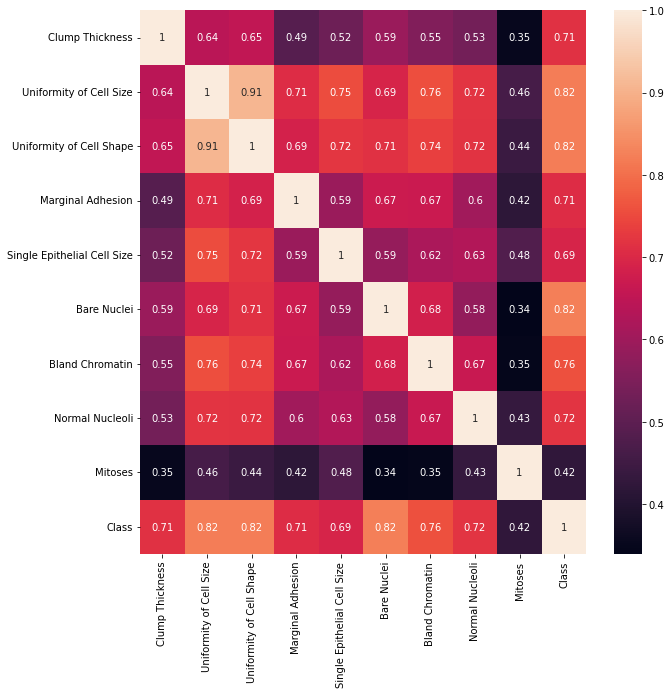

In [234]:
##Correlación
fig3=plt.subplots(1,1,figsize=(10,10)) 
relac=df_cancer.iloc[:,1:]

relac=relac.corr()
sns.heatmap(relac,annot=True)
plt.show()

## Clasificación

### GaussianNB

In [235]:
auxiliar=df_cancer.copy()
auxiliar["Class"]=auxiliar["Class"].astype(str)
auxiliar["Class"]=auxiliar["Class"].replace("2","Benigno")
auxiliar["Class"]=auxiliar["Class"].replace("4","Maligno")
auxiliar
competir=pd.DataFrame(index=["GaussianNB","DecisionTreeClassifier","K-Nearest"])
x_train,x_test,y_train,y_test=train_test_split(auxiliar.iloc[:,1:10].values,auxiliar["Class"],test_size=0.3)

gaus=GaussianNB()
modelo=gaus.fit(x_train,y_train)

y_predic=modelo.predict(x_test)

precision=accuracy_score(y_predic,y_test)

print(F"Precision del modelo GaussianNB: {precision*100}%")
competir.loc["GaussianNB","Precisión"]=precision

Precision del modelo GaussianNB: 95.60975609756098%


### DecisionTreeClassifier

In [236]:
## Decision Tree classifier

arbol=dtree.DecisionTreeClassifier(criterion='entropy')
modelo2=arbol.fit(x_train,y_train)
y_predic=modelo2.predict(x_test)
precision2=accuracy_score(y_predic,y_test)

print(F"Porcentaje precision del modelo GaussianNB: {precision2*100}%")
competir.loc["DecisionTreeClassifier","Precisión"]=precision2


Porcentaje precision del modelo GaussianNB: 94.6341463414634%


### K-Nearest

In [237]:
## K-Nearest

knn=KNeighborsClassifier(n_neighbors=3)
modelo3=knn.fit(x_train,y_train)
y_predic=modelo3.predict(x_test)
precision3=accuracy_score(y_predic,y_test)
print(F"Porcentaje precision del modelo GaussianNB: {precision3*100}%")
competir.loc["K-Nearest","Precisión"]=precision3


Porcentaje precision del modelo GaussianNB: 96.09756097560975%


### Mayor precisión

In [238]:
competir=competir.sort_values("Precisión",ascending=False)
ganador=competir.head(1)
competir

Precisión
K-Nearest                0.960976
GaussianNB               0.956098
DecisionTreeClassifier   0.946341

In [239]:
print(F"Mayor precision: {ganador.index[0]}")

Mayor precision: K-Nearest


## Arbol decisiones grafico

In [240]:
ar=export_text(modelo2,feature_names=list(auxiliar.iloc[:,1:10].columns.values))
print(ar)

|--- Uniformity of Cell Shape <= 2.50
|   |--- Clump Thickness <= 5.50
|   |   |--- class: Benigno
|   |--- Clump Thickness >  5.50
|   |   |--- Uniformity of Cell Shape <= 1.50
|   |   |   |--- class: Benigno
|   |   |--- Uniformity of Cell Shape >  1.50
|   |   |   |--- class: Maligno
|--- Uniformity of Cell Shape >  2.50
|   |--- Uniformity of Cell Size <= 3.50
|   |   |--- Bare Nuclei <= 2.50
|   |   |   |--- Mitoses <= 2.50
|   |   |   |   |--- class: Benigno
|   |   |   |--- Mitoses >  2.50
|   |   |   |   |--- class: Maligno
|   |   |--- Bare Nuclei >  2.50
|   |   |   |--- Clump Thickness <= 6.50
|   |   |   |   |--- Bland Chromatin <= 4.50
|   |   |   |   |   |--- Bare Nuclei <= 3.50
|   |   |   |   |   |   |--- class: Maligno
|   |   |   |   |   |--- Bare Nuclei >  3.50
|   |   |   |   |   |   |--- Bare Nuclei <= 6.00
|   |   |   |   |   |   |   |--- class: Benigno
|   |   |   |   |   |   |--- Bare Nuclei >  6.00
|   |   |   |   |   |   |   |--- Marginal Adhesion <= 4.50
|   

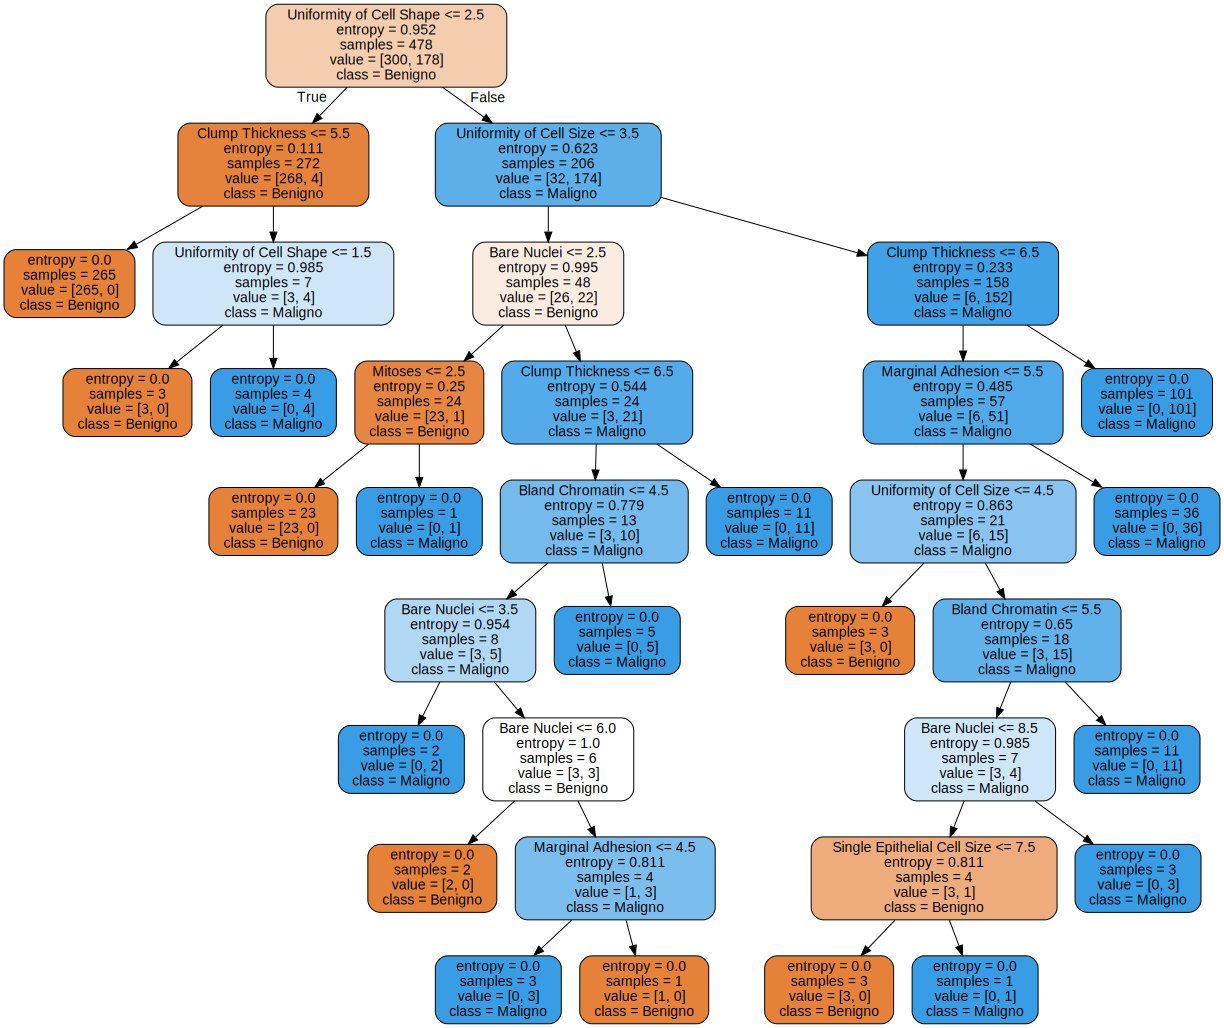

In [241]:
dot_data=dtree.export_graphviz(modelo2, out_file=None, feature_names=list(auxiliar.iloc[:,1:10].columns.values), 
                                class_names=list(np.unique(auxiliar["Class"].values)), rounded=True, filled=True)
graph=graphviz.Source(dot_data)

graph


<font size=5>Podemos ver claramente en el DecisionTreeClassifier Que a medida que se va descendiendo los diferentes niveles la entropía bajan drasticamente hasta llegar a 0 de entropía lo que hace el modelo muy viable para predecir.</font>

# Punto 3

<font size=6>Se necesita del archivo "DataSetDigitos.csv" para la correcta ejecución de este punto</font>

## Datos

In [242]:
df_imagen=pd.read_csv("DataSetDigitos.csv")
df_imagen.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

## Analisis exploratorio

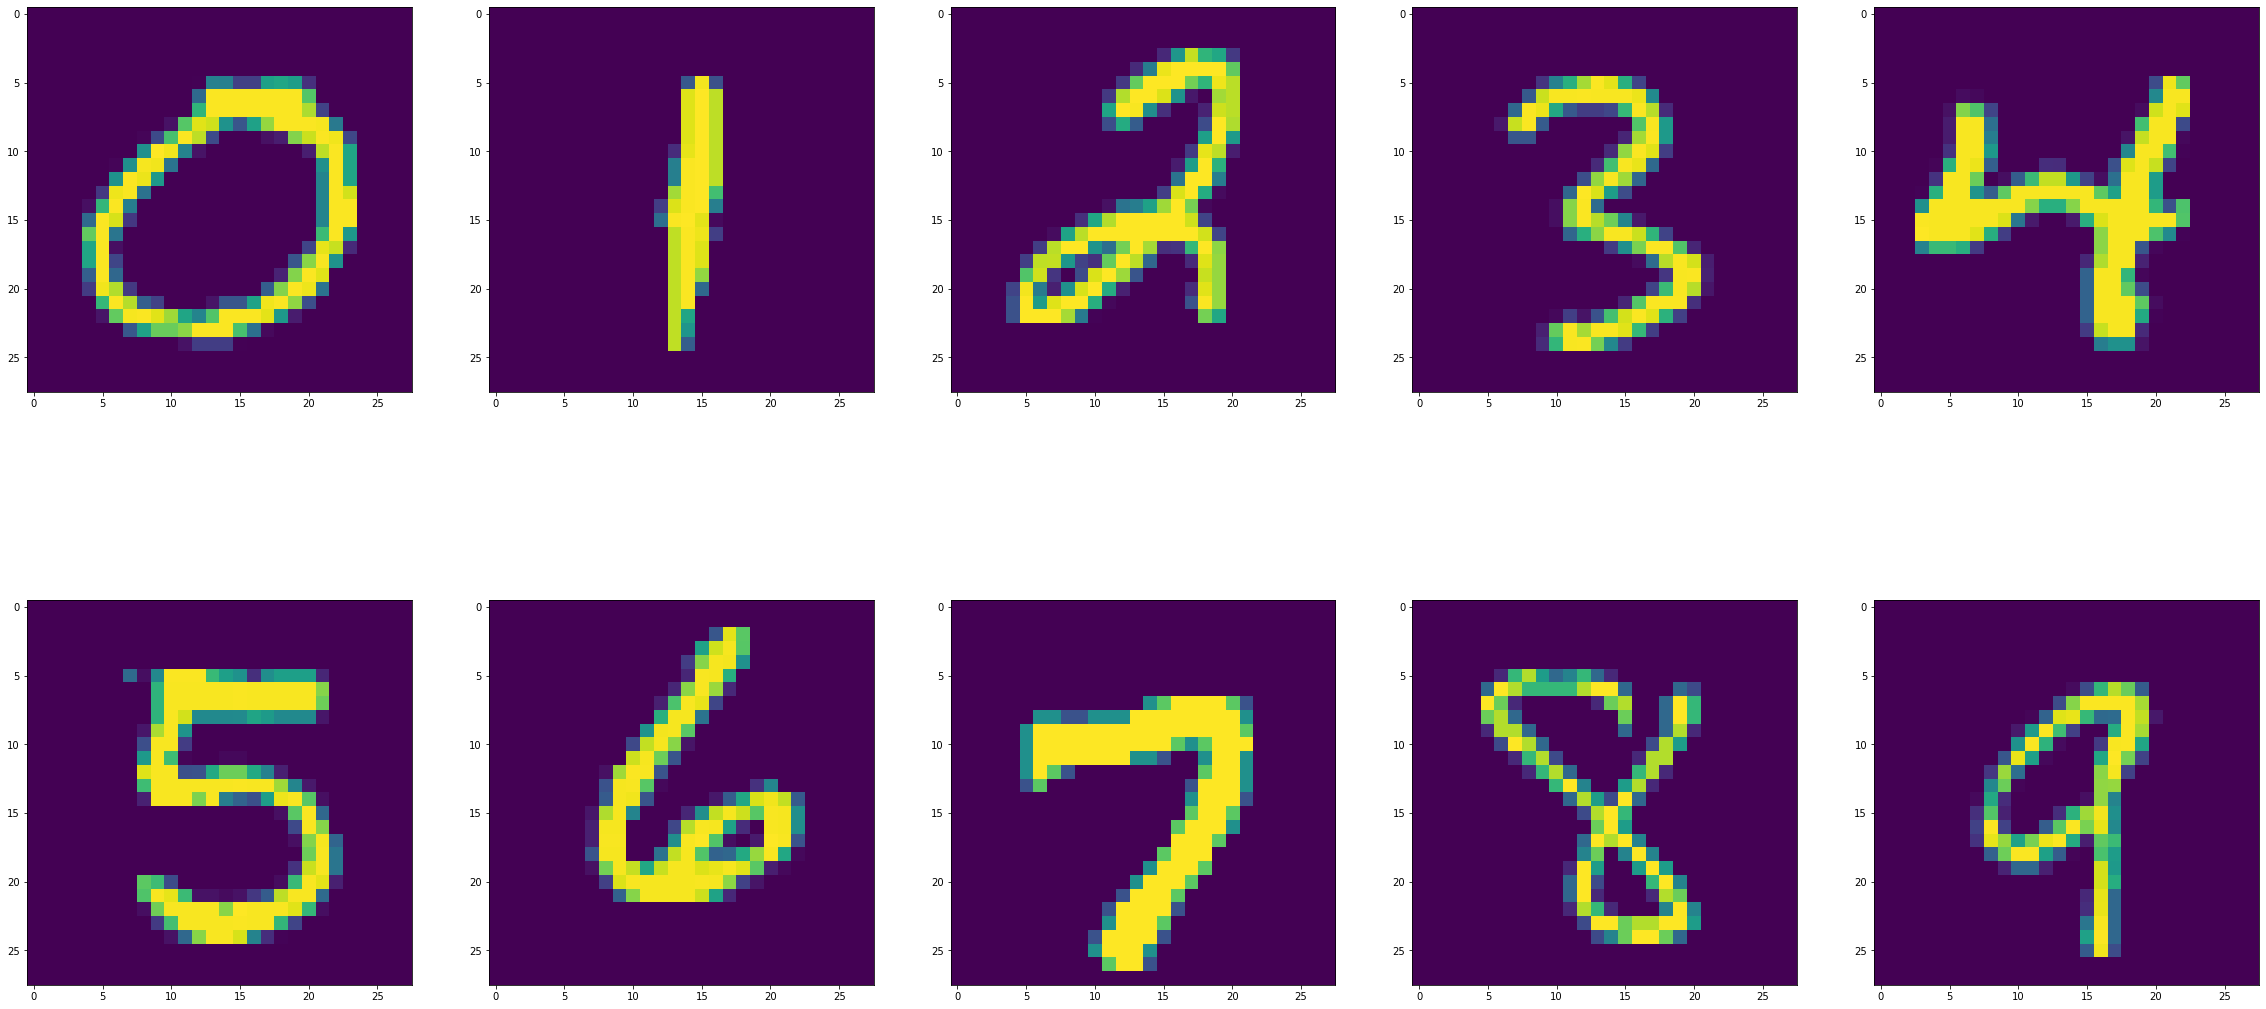

In [243]:
figdi,axd=plt.subplots(2,5,figsize=(40,20))
contador=0
for x in range(2):
    for y in range(5):
        ayuda=df_imagen[df_imagen["label"]==contador].tail(1).values[0,1:]
        ayuda=ayuda.reshape((28,28))
        axd[x,y].imshow(ayuda)
        contador+=1


In [244]:
df_imagen[df_imagen["label"]==8].tail(1).copy()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
41982      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
41982       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
41982         0         0         0         0         0  

[1 rows x 785 columns]

## Clasificadores

### GaussianNB

In [245]:
ayuda_2=df_imagen.iloc[:,1:]
competir=pd.DataFrame(index=["GaussianNB","DecisionTreeClassifier","K-Nearest"])
x_train,x_test,y_train,y_test=train_test_split(ayuda_2.values,df_imagen["label"],test_size=0.3)
gaus=GaussianNB()
modelo1=gaus.fit(x_train,y_train)
y_predic=modelo1.predict(x_test)
precision1=accuracy_score(y_predic,y_test)
print(F"Precision de GaussianNB: {precision1*100}%")
competir.loc["GaussianNB","Precisión"]=precision1

Precision de GaussianNB: 56.63492063492064%


### DecisionTreeClassifier

In [246]:
arbol=dtree.DecisionTreeClassifier(criterion='entropy')
modelo2=arbol.fit(x_train,y_train)
y_predic=modelo2.predict(x_test)
precision2=accuracy_score(y_predic,y_test)
print(F"Precision de DecisionTreeClassifier: {precision2*100}%")
competir.loc["DecisionTreeClassifier","Precisión"]=precision2

Precision de DecisionTreeClassifier: 86.4126984126984%


### K-Nearest

In [247]:

vecino=KNeighborsClassifier(n_neighbors=3)
modelo3=vecino.fit(x_train,y_train)
y_predic=modelo3.predict(x_test)

precision3=accuracy_score(y_predic,y_test)
print(F"Precision de K-Nearest: {precision3*100}%")
competir.loc["K-Nearest","Precisión"]=precision3

Precision de K-Nearest: 96.54761904761905%


### Mayor precisión

In [248]:
competir=competir.sort_values("Precisión",ascending=False)
ganador=competir.head(1)
competir

Precisión
K-Nearest                0.965476
DecisionTreeClassifier   0.864127
GaussianNB               0.566349

In [249]:
print(F"Modelo con Mayor precision: {ganador.index[0]}")

Modelo con Mayor precision: K-Nearest


## DecisionTreeClassifier Gráfico

In [250]:
ar=export_text(modelo2,feature_names=list(df_imagen.iloc[:,1:].columns.values))
print(ar)

|--- pixel378 <= 83.50
|   |--- pixel568 <= 0.50
|   |   |--- pixel458 <= 0.50
|   |   |   |--- pixel404 <= 4.00
|   |   |   |   |--- pixel154 <= 0.50
|   |   |   |   |   |--- pixel483 <= 2.00
|   |   |   |   |   |   |--- pixel151 <= 7.00
|   |   |   |   |   |   |   |--- pixel349 <= 165.00
|   |   |   |   |   |   |   |   |--- pixel460 <= 51.00
|   |   |   |   |   |   |   |   |   |--- pixel536 <= 68.00
|   |   |   |   |   |   |   |   |   |   |--- pixel182 <= 24.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- pixel182 >  24.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- pixel536 >  68.00
|   |   |   |   |   |   |   |   |   |   |--- pixel441 <= 14.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- pixel441 >  14.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |

In [251]:
dot_data=dtree.export_graphviz(modelo2, out_file=None,feature_names=list(df_imagen.drop("label",axis=1).columns.values), class_names=list(np.unique(df_imagen["label"].astype(str).values)), 
                                 rounded=True, filled=True)

graph=graphviz.Source(dot_data)

graph

<font size=5>El modelo demuestra ser bueno para predecir, con sus bajos niveles de desorden (Entropía)</font>